In [1]:
#Code by 'Real vs Fake face detection' https://www.kaggle.com/code/debasisdotcom/real-vs-fake-face-detection

import numpy as np
import pandas as pd
import random
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense,BatchNormalization, Flatten, MaxPool2D
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
from keras.layers import Conv2D, Reshape
from tensorflow.keras.utils import Sequence
from keras.backend import epsilon
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam


from sklearn.metrics import classification_report, confusion_matrix

import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Code by 'Transfer Learning - Image Classification + Deploy' https://www.kaggle.com/code/yash161101/transfer-learning-image-classification-deploy
train_dir = "C:/Users/user/AIML(jupyter)/train1"
train_class=os.listdir('C:/Users/user/AIML(jupyter)/train1')
print(train_class)


test_dir = "C:/Users/user/AIML(jupyter)/test1"
test_class=os.listdir(test_dir)
print(test_class)

['cats', 'dogs']
['cats', 'dogs']


In [3]:
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

x = []  # image arrays
y = []  # labels

for folder in os.listdir(train_dir):
    folder_path = os.path.join(train_dir, folder)
    if not os.path.isdir(folder_path):  # skip if not a folder
        continue
    
    image_list = os.listdir(folder_path)
    for img_name in image_list:
        img_path = os.path.join(folder_path, img_name)

        # ✅ Skip if it's not a file (e.g., a folder or hidden file)
        if not os.path.isfile(img_path):
            continue
        
        try:
            # Load and preprocess image
            img = image.load_img(img_path, target_size=(224, 224))
            img = image.img_to_array(img)
            img = preprocess_input(img)

            x.append(img)
            y.append(train_class.index(folder))

        except Exception as e:
            print(f"Skipping {img_path}, error: {e}")

print("Preparing Training Dataset Completed.")


Preparing Training Dataset Completed.


In [4]:
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

test_images = []
test_images_Original = []
test_image_label = []

for folder in os.listdir(test_dir):
    folder_path = os.path.join(test_dir, folder)
    if not os.path.isdir(folder_path):  # skip if it's not a folder
        continue

    image_list = os.listdir(folder_path)
    for img_name in image_list:
        img_path = os.path.join(folder_path, img_name)

        # ✅ Skip if not a file (sometimes folders or hidden files sneak in)
        if not os.path.isfile(img_path):
            continue

        try:
            # Load image
            img = image.load_img(img_path, target_size=(224, 224))

            # Convert to array
            img = image.img_to_array(img)

            # Keep original for visualization
            test_images_Original.append(img.copy())

            # Preprocess for MobileNetV2
            img = preprocess_input(img)

            test_images.append(img)
            test_image_label.append(test_class.index(folder))

        except Exception as e:
            print(f"Skipping {img_path}, error: {e}")

print("Preparing Test Dataset Completed.")


Preparing Test Dataset Completed.


In [5]:
# from tensorflow.keras.utils import image_dataset_from_directory

# # Load raw datasets
# train_raw = image_dataset_from_directory(
#     train_dir,
#     image_size=(224, 224),
#     batch_size=32
# )

# test_raw = image_dataset_from_directory(
#     test_dir,
#     image_size=(224, 224),
#     batch_size=32
# )


In [6]:
# # ✅ Save class names here, before mapping
# class_names = train_raw.class_names
# print("Classes:", class_names)

In [7]:
# # Preprocessing for MobileNetV2
# train_ds = train_ds.map(lambda x, y: (preprocess_input(x), y))
# test_ds = test_ds.map(lambda x, y: (preprocess_input(x), y))

In [8]:
# # Optional: improve performance
# AUTOTUNE = tf.data.AUTOTUNE
# train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
# test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

In [9]:
#Code by 'Transfer Learning - Image Classification + Deploy' https://www.kaggle.com/code/yash161101/transfer-learning-image-classification-deploy
# Training Dataset
print("Training Dataset")

x=np.array(x) # Converting to np arrary to pass to the model
print(x.shape)

y=to_categorical(y) # onehot encoding of the labels
# print(y)
print(y.shape)

print("Test Dataset")

test_images=np.array(test_images) 
print(test_images.shape)

test_image_label=to_categorical(test_image_label) # onehot encoding of the labels)
print(test_image_label.shape)

Training Dataset
(557, 224, 224, 3)
(557, 2)
Test Dataset
(140, 224, 224, 3)
(140, 2)


In [10]:
#Code by 'Transfer Learning - Image Classification + Deploy' https://www.kaggle.com/code/yash161101/transfer-learning-image-classification-deploy

xtrain, xval, ytrain, yval = train_test_split(x,y,test_size=0.2,random_state=5)
print("Splitting data for train and val completed.")

Splitting data for train and val completed.


In [11]:
import os

print("Train dir:", train_dir)
for root, dirs, files in os.walk(train_dir):
    print(root, "->", len(files), "files")

print("\nTest dir:", test_dir)
for root, dirs, files in os.walk(test_dir):
    print(root, "->", len(files), "files")


Train dir: C:/Users/user/AIML(jupyter)/train1
C:/Users/user/AIML(jupyter)/train1 -> 0 files
C:/Users/user/AIML(jupyter)/train1\cats -> 279 files
C:/Users/user/AIML(jupyter)/train1\dogs -> 278 files

Test dir: C:/Users/user/AIML(jupyter)/test1
C:/Users/user/AIML(jupyter)/test1 -> 0 files
C:/Users/user/AIML(jupyter)/test1\cats -> 70 files
C:/Users/user/AIML(jupyter)/test1\dogs -> 70 files


In [12]:
#Code by 'Transfer Learning - Image Classification + Deploy' https://www.kaggle.com/code/yash161101/transfer-learning-image-classification-deploy

xtrain, xval, ytrain, yval = train_test_split(x,y,test_size=0.2,random_state=5)
print("Splitting data for train and val completed.")

Splitting data for train and val completed.


In [13]:
rand_images1 = random.sample(os.listdir("C:/Users/user/AIML(jupyter)/train1/dogs"), 8)
rand_images2 = random.sample(os.listdir("C:/Users/user/AIML(jupyter)/train1/cats"), 8)

In [17]:
!pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable


In [18]:
import cv2

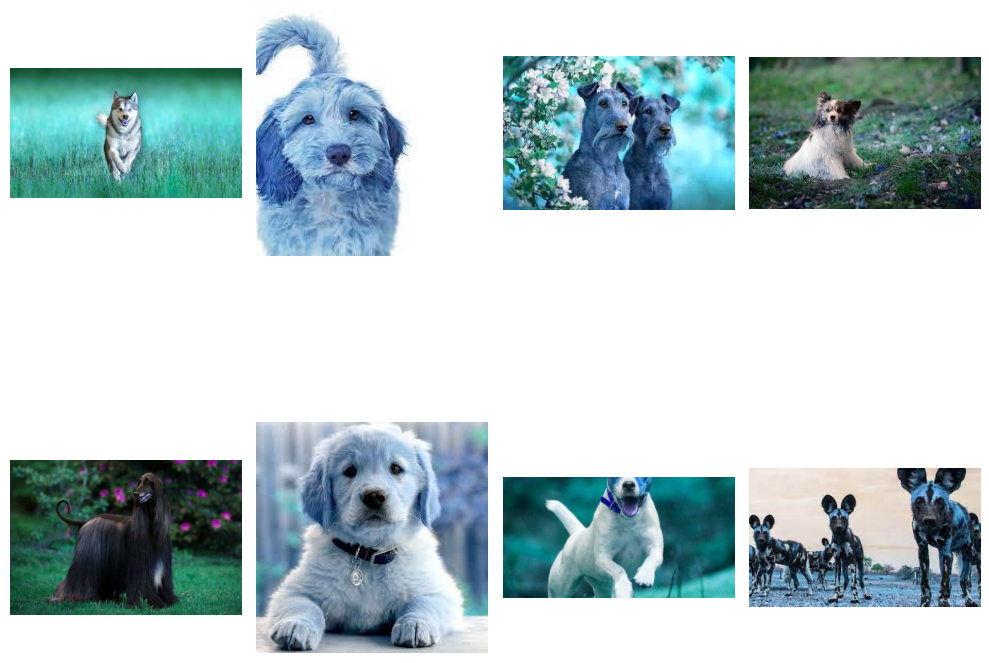

In [20]:
import cv2
fig = plt.figure(figsize=(10,10))
for i, im in enumerate(rand_images1):
    plt.subplot(2,4 , i+1)
    im = cv2.imread(os.path.join("C:/Users/user/AIML(jupyter)/train1/dogs", im))
    plt.imshow(im)
    plt.axis('off')
plt.tight_layout()
plt.show()

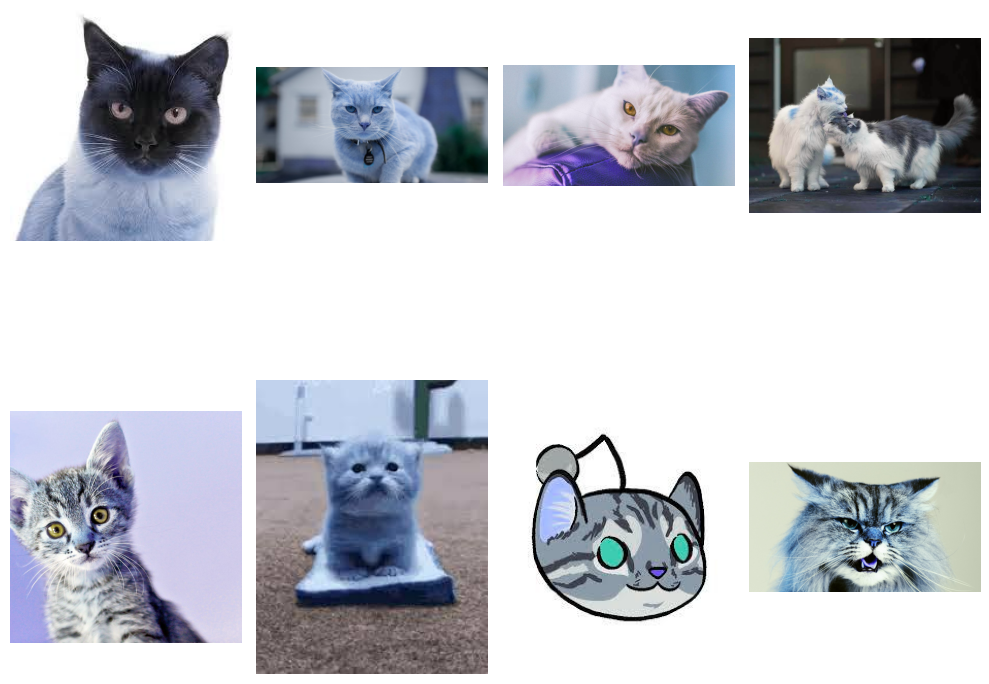

In [21]:
fig = plt.figure(figsize=(10,10))
for i, im in enumerate(rand_images2):
    plt.subplot(2,4 , i+1)
    im = cv2.imread(os.path.join("C:/Users/user/AIML(jupyter)/train1/cats", im))
    plt.imshow(im)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [22]:
#Code by 'Real vs Fake face detection' https://www.kaggle.com/code/debasisdotcom/real-vs-fake-face-detection
mnet = MobileNetV2(include_top = False, weights = "imagenet" ,input_shape=(224,224,3))

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 13s 1us/step


In [23]:
tf.keras.backend.clear_session()

model = Sequential([
    mnet,
    GlobalAveragePooling2D(),
    Dense(512, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation="relu"),
    Dropout(0.1),
    Dense(32, activation="relu"),
    Dropout(0.3),
    Dense(2, activation="sigmoid")
])

model.layers[0].trainable = False

model.compile(
    loss="categorical_crossentropy", 
    optimizer="Adam", 
    metrics=["accuracy"]
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,985,762 (11.39 MB)

 Trainable params: 726,754 (2.77 MB)

 Non-trainable params: 2,259,008 (8.62 MB)

In [24]:
#Code by 'Real vs Fake face detection' https://www.kaggle.com/code/debasisdotcom/real-vs-fake-face-detection

def scheduler(epoch):
    if epoch <= 2:
        return 0.001
    elif epoch > 2 and epoch <= 15:
        return 0.0001 
    else:
        return 0.00001

lr_callbacks = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [25]:
EPOCHS = 7
hist = model.fit(xtrain, ytrain, epochs=EPOCHS, callbacks=[lr_callbacks], validation_data=(xval,yval))

Epoch 1/7
14/14 ━━━━━━━━━━━━━━━━━━━━ 25s 832ms/step - accuracy: 0.8742 - loss: 0.3275 - val_accuracy: 0.8661 - val_loss: 0.3368 - learning_rate: 0.0010
Epoch 2/7
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 562ms/step - accuracy: 0.9685 - loss: 0.0838 - val_accuracy: 0.7768 - val_loss: 0.6332 - learning_rate: 0.0010
Epoch 3/7
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 573ms/step - accuracy: 0.9843 - loss: 0.0423 - val_accuracy: 0.8393 - val_loss: 0.5298 - learning_rate: 0.0010
Epoch 4/7
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 565ms/step - accuracy: 0.9978 - loss: 0.0127 - val_accuracy: 0.8750 - val_loss: 0.3321 - learning_rate: 1.0000e-04
Epoch 5/7
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 566ms/step - accuracy: 0.9955 - loss: 0.0266 - val_accuracy: 0.9018 - val_loss: 0.2010 - learning_rate: 1.0000e-04
Epoch 6/7
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 573ms/step - accuracy: 0.9910 - loss: 0.0274 - val_accuracy: 0.9375 - val_loss: 0.1337 - learning_rate: 1.0000e-04
Epoch 7/7
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 630ms/step - accuracy: 0.9955 - loss: 0.0

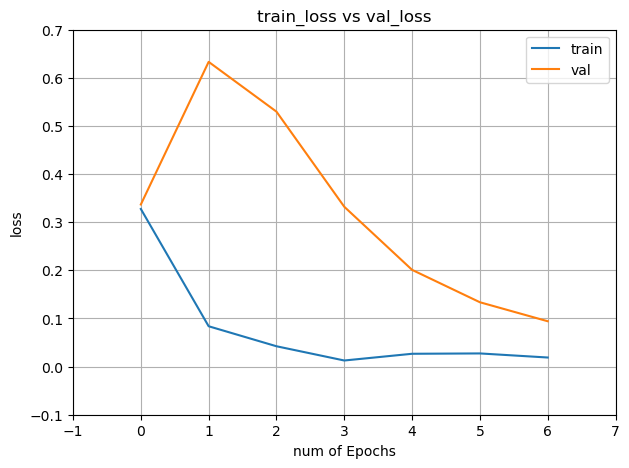

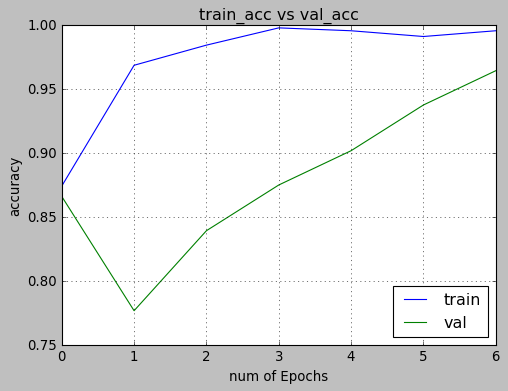

In [26]:
#Code by 'Real vs Fake face detection' https://www.kaggle.com/code/debasisdotcom/real-vs-fake-face-detection

epochs = 7
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
xc = range(epochs)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [27]:
#Code by 'Transfer Learning - Image Classification + Deploy' https://www.kaggle.com/code/yash161101/transfer-learning-image-classification-deploy
def predict(img_name, model):
    img=image.load_img(img_name,target_size=(224,224))
    img=image.img_to_array(img)
    plt.imshow(img.astype('int32'))
    plt.show()
    img=preprocess_input(img)
    prediction=model.predict(img.reshape(1,224,224,3))
    output=np.argmax(prediction)
    print(train_class[output])


# This function plots the image supplied in array
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.astype('int32'))
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

In [28]:
#Code by 'Transfer Learning - Image Classification + Deploy' https://www.kaggle.com/code/yash161101/transfer-learning-image-classification-deploy
# Preparing prediction arrary
predictions=[]

for img in test_images:
    img=img.reshape(1,224,224,3)
    predictions.append(model.predict(img))

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [29]:
#Code by 'Transfer Learning - Image Classification + Deploy' https://www.kaggle.com/code/yash161101/transfer-learning-image-classification-deploy
pred_labels = model.predict(test_images)

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 388ms/step


In [30]:
#Code by 'Transfer Learning - Image Classification + Deploy' https://www.kaggle.com/code/yash161101/transfer-learning-image-classification-deploy
def roundoff(arr):
    """To round off according to the argmax of each predicted label array. """
    arr[np.argwhere(arr != arr.max())] = 0
    arr[np.argwhere(arr == arr.max())] = 1
    return arr

for labels in pred_labels:
    labels = roundoff(labels)

print(classification_report(test_image_label, pred_labels, target_names=test_class))

              precision    recall  f1-score   support

        cats       0.93      1.00      0.97        70
        dogs       1.00      0.93      0.96        70

   micro avg       0.96      0.96      0.96       140
   macro avg       0.97      0.96      0.96       140
weighted avg       0.97      0.96      0.96       140
 samples avg       0.96      0.96      0.96       140



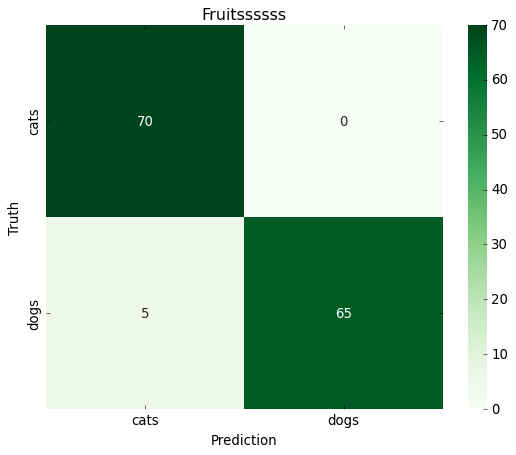

In [31]:
#Code by 'Transfer Learning - Image Classification + Deploy' https://www.kaggle.com/code/yash161101/transfer-learning-image-classification-deploy
pred_ls = np.argmax(pred_labels, axis=1)
test_ls = np.argmax(test_image_label, axis=1)

conf_arr = confusion_matrix(test_ls, pred_ls)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax = sns.heatmap(conf_arr, cmap='Greens', annot=True, fmt='d', xticklabels= test_class,
                yticklabels=test_class)

plt.title('Fruitssssss')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)

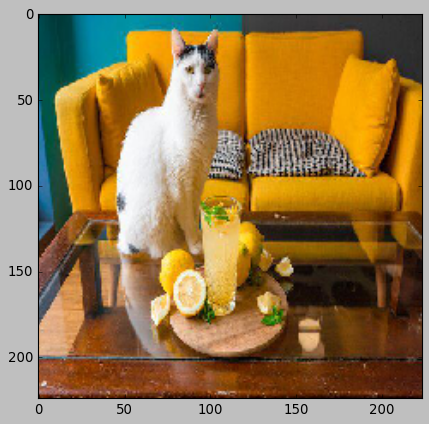

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
cats


In [35]:
#Code by 'Transfer Learning - Image Classification + Deploy' https://www.kaggle.com/code/yash161101/transfer-learning-image-classification-deploy
predict("C:/Users/user/AIML(jupyter)/test1/cats/cat_473.jpg",model)

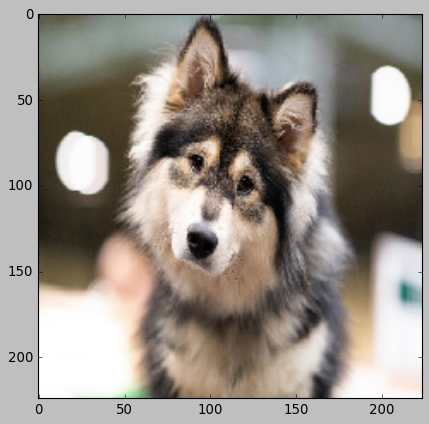

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
dogs


In [36]:
#Code by 'Transfer Learning - Image Classification + Deploy' https://www.kaggle.com/code/yash161101/transfer-learning-image-classification-deploy
predict("C:/Users/user/AIML(jupyter)/test1/dogs/dog_258.jpg",model)